### Preamble stuff (can ignore)

In [3]:
from miscpy.utils.sympyhelpers import *
init_printing()

In [4]:
M,h,m1,m2,th1,th2,b,l1,l2 = \
symbols('M,h,m_1,m_2,theta_1,theta_2,beta,l_1,l_2')

### Model the Cab as a Cube : $\left[\mathbb{I}_O^\textrm{cab}\right]_\mathcal{A}=$

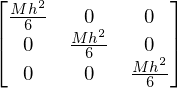

In [5]:
I_O_cab = M*2/3*h**2/4*eye(3); I_O_cab

### Model the Links as Thin Rods: 
### $\left[\mathbb{I}_{G_1}^{m_1}\right]_\mathcal{B}=$

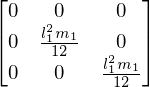

In [6]:
I_G1_m1_B = m1*l1**2/12*(eye(3) - diag(1,0,0)); I_G1_m1_B

### Rotate the MOI matrix of $m_1$ into frame $\mathcal{A}$:
### $\left[\mathbb{I}_{G_1}^{m_1}\right]_\mathcal{A}= {}^{\mathcal A}{C}^\mathcal B\left[\mathbb{I}_{G_1}^{m_1}\right]_\mathcal{B}{}^{\mathcal B}{C}^\mathcal A$

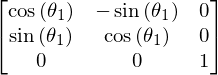

In [7]:
aCb = Matrix(([cos(th1),-sin(th1),0],[sin(th1),cos(th1),0],[0,0,1])); aCb

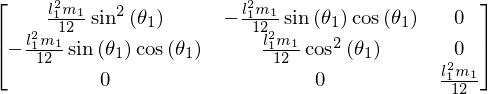

In [8]:
I_G1_m1_A = aCb*I_G1_m1_B*aCb.transpose(); I_G1_m1_A

### Apply parallel axis theorem to find MOI of $m_1$ about $O$:
### $\left[\mathbb{I}_{O}^{m_1}\right]_\mathcal{A} =\left[\mathbb{I}_{G_1}^{m_1}\right]_\mathcal{A} + m_1(\Vert \mathbf{r}_{O/G_1}\Vert^2 I - \left[\mathbf{r}_{O/G_1}\right]_\mathcal{A}\left[\mathbf{r}_{O/G_1}\right]_\mathcal{A}^T)$
### $\mathbf{r}_{O/G_1} = -\frac{l_1}{2}\mathbf{b_1}  -\frac{h}{2}\mathbf{a_1} $

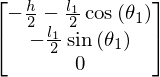

In [9]:
r_O_G1 = aCb*Matrix([-l1/2,0,0]) + Matrix([-h/2,0,0]); r_O_G1

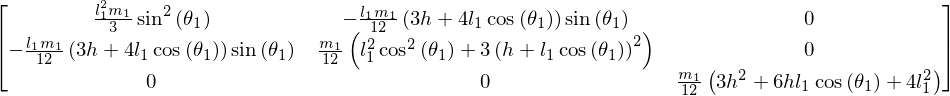

In [10]:
I_O_m1_A = simplify(I_G1_m1_A + m1*((r_O_G1.transpose()*r_O_G1)[0]*eye(3) - r_O_G1*r_O_G1.transpose())); I_O_m1_A

### $\left[\mathbb{I}_{G_2}^{m_2}\right]_\mathcal{C}=$

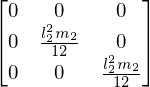

In [11]:
I_G2_m2_C = m2*l2**2/12*(eye(3) - diag(1,0,0)); I_G2_m2_C

### Rotate the MOI matrix of $m_2$ into frame $\mathcal{A}$:
### ${}^{\mathcal A}{C}^\mathcal C = {}^{\mathcal A}{C}^\mathcal B {}^{\mathcal B}{C}^\mathcal c$
### $\left[\mathbb{I}_{G_2}^{m_2}\right]_\mathcal{A}= {}^{\mathcal A}{C}^\mathcal C\left[\mathbb{I}_{G_2}^{m_2}\right]_\mathcal{C}{}^{\mathcal C}{C}^\mathcal A$

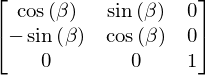

In [12]:
bCc = Matrix(([cos(b),sin(b),0],[-sin(b),cos(b),0],[0,0,1])); bCc

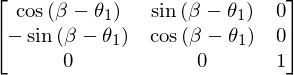

In [13]:
aCc = simplify(aCb*bCc); aCc

### Simplify by defining $\theta_2 \triangleq \beta - \theta_1$

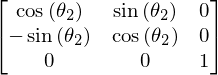

In [14]:
aCc = aCc.subs(b-th1,th2); aCc

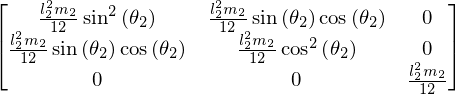

In [15]:
I_G2_m2_A = aCc*I_G2_m2_C*aCc.transpose(); I_G2_m2_A

### Apply parallel axis theorem to find MOI of $m_2$ about $O$:
### $\left[\mathbb{I}_{O}^{m_2}\right]_\mathcal{A} =\left[\mathbb{I}_{G_2}^{m_2}\right]_\mathcal{A}+ m_2(\Vert \mathbf{r}_{O/G_2}\Vert^2 I - \left[\mathbf{r}_{O/G_2}\right]_\mathcal{A}\left[\mathbf{r}_{O/G_2}\right]_\mathcal{A}^T)$
### $\mathbf{r}_{O/G_2} = -\frac{l_2}{2}\mathbf{c_1} - l_1 \mathbf{b_1} -\frac{h}{2}\mathbf{a_1} $

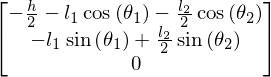

In [16]:
r_O_G2 = aCc*Matrix([-l2/2,0,0]) + aCb*Matrix([-l1,0,0]) + Matrix([-h/2,0,0]); r_O_G2

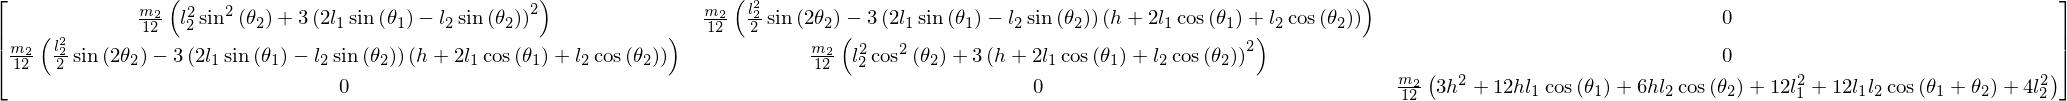

In [17]:
I_O_m2_A = simplify(I_G2_m2_A + m2*((r_O_G2.transpose()*r_O_G2)[0]*eye(3) - r_O_G2*r_O_G2.transpose())); I_O_m2_A

### Total Moment of Inertia is the sum of the 3 Moment of Inertia matrices
### $\left[\mathbb{I}_{O}\right]_\mathcal{A} =\left[\mathbb{I}_{O}^{m_1}\right]_\mathcal{A}+\left[\mathbb{I}_{O}^{m_2}\right]_\mathcal{A} + \left[\mathbb{I}_{O}^{\textrm{cab}}\right]_\mathcal{A}$

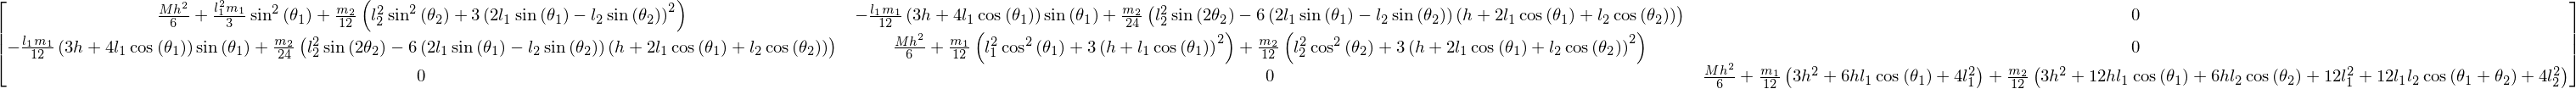

In [18]:
I_O_A = simplify(I_O_cab + I_O_m1_A + I_O_m2_A); I_O_A